# Imports

In [5]:
import json
import os
import albumentations as A 
import cv2
import matplotlib.pyplot as plt
import yaml

# Converting JSON to YOLO format 

YOLO FORMAT: CLASS X_CENTER Y_CENTER WIDTH HEIGHT (all except CLASS normalized by image height and width)

## Creating the TXT YOLO formatted files for bboxes

In [1]:
out_of_range_bboxes = []  # List to track out-of-range bounding boxes


In [2]:
def convert_to_yolo(json_file, output_file, image_width, image_height):
    with open(json_file) as f:
        data = json.load(f)
        with open(output_file, 'a') as outfile:
            for item in data:
                # Calculate normalized bounding box coordinates
                width = (item['Right'] - item['Left']) / image_width
                height = (item['Bottom'] - item['Top']) / image_height
                x_center = (item['Left'] + item['Right']) / (2 * image_width)
                y_center = (item['Top'] + item['Bottom']) / (2 * image_height)
                
                # Check if any coordinate is out of range [0, 1]
                if any(val > 1 for val in [x_center, y_center, width, height]):
                    out_of_range_bboxes.append([x_center, y_center, width, height])
                else: 
                    yolo_format = f"{item['ObjectClassId']} {x_center:.4f} {y_center:.4f} {width:.4f} {height:.4f}"
                    outfile.write(yolo_format + '\n')

Since we need to normalize all bboxes in YOLO format, we need to access each image's height and width.

In [3]:
def get_image_dimensions(folder_path):
    image_dimensions = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith((".jpg", ".png", ".jpeg")):
            image_path = os.path.join(folder_path, file_name)
            image = cv2.imread(image_path)
            if image is not None:
                height, width, _ = image.shape
                image_dimensions.append((width, height))
    return image_dimensions

In [6]:
image_path_train = f"../data/Training/images"
image_path_test = f"../data/Testing/images"

dimensions_train = get_image_dimensions(image_path_train)
dimensions_test = get_image_dimensions(image_path_test)

In [54]:
# Base directory
current_dir = 'Testing' # Change to selected dir (Training / Testing / Validation)
base_dir = f"../data/{current_dir}/labels"
input_folder = os.path.join(base_dir, "json")
output_folder = os.path.join(base_dir, "txt")

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

In [55]:
count = 0
for file_name in os.listdir(input_folder):
    if file_name.endswith(".json"):
        input_file_path = os.path.join(input_folder, file_name)
        output_file_path = os.path.join(output_folder, os.path.splitext(file_name)[0] + ".txt")
        image_width, image_height = dimensions_train[count] 
        convert_to_yolo(input_file_path, output_file_path, image_width, image_height)
        count+=1

In [56]:
len(out_of_range_bboxes)

136

## Images Visualization

In [11]:
folder_path_labels = "../data/Training/labels/txt"
folder_path_images = "../data/Training/images"

Note that we only extracted the image label (index 0) from the txt files to visualize it with OpenCV. We will be redefining the bboxes_list for Albumentations later on.

In [84]:
bboxes_list = []

for filename in os.listdir(folder_path_labels):
    if filename.endswith(".txt"):
        print(filename)
        txt_path = os.path.join(folder_path_labels, filename)
        with open(txt_path, 'r') as file:
            lines = file.readlines()
            bboxes = []
            for line in lines:
                data = line.strip().split()
                bbox = [float(coord) for coord in data]
                bboxes.append(bbox)
            bboxes_list.append(bboxes)

0.txt
1.txt
10.txt
100.txt
1000.txt
1001.txt
1002.txt
1003.txt
1004.txt
1005.txt
1006.txt
1007.txt
1008.txt
1009.txt
101.txt
1010.txt
1011.txt
1012.txt
1013.txt
1014.txt
1015.txt
1016.txt
1017.txt
1018.txt
1019.txt
102.txt
1020.txt
1021.txt
1022.txt
1023.txt
1024.txt
1025.txt
1026.txt
1027.txt
1028.txt
1029.txt
103.txt
1030.txt
1031.txt
1032.txt
1033.txt
1034.txt
1035.txt
1036.txt
1037.txt
1038.txt
1039.txt
104.txt
1040.txt
1041.txt
1042.txt
1043.txt
1044.txt
1045.txt
1046.txt
1047.txt
1048.txt
1049.txt
105.txt
1050.txt
1051.txt
1052.txt
1053.txt
1054.txt
1055.txt
1056.txt
1057.txt
1058.txt
1059.txt
106.txt
1060.txt
1061.txt
1062.txt
1063.txt
1064.txt
1065.txt
1066.txt
1067.txt
1068.txt
1069.txt
107.txt
1070.txt
1071.txt
1072.txt
1073.txt
1074.txt
1075.txt
1076.txt
1077.txt
1078.txt
1079.txt
108.txt
1080.txt
1081.txt
1082.txt
1083.txt
1084.txt
1085.txt
1086.txt
1087.txt
1088.txt
1089.txt
109.txt
1090.txt
1091.txt
1092.txt
1093.txt
1094.txt
1095.txt
1096.txt
1097.txt
1098.txt
1099.txt
1

In [13]:
data_img = []
# filenames = sorted(os.listdir(folder_path_images), key=lambda x: int(os.path.splitext(x)[0]))

for filename in os.listdir(folder_path_images):
    print(filename)
    img_path = os.path.join(folder_path_images, filename)
    if img_path.endswith(".jpg"):
        img = cv2.imread(img_path)
        data_img.append(img)

0.jpg
1.jpg
10.jpg
100.jpg
1000.jpg
1001.jpg
1002.jpg
1003.jpg
1004.jpg
1005.jpg
1006.jpg
1007.jpg
1008.jpg
1009.jpg
101.jpg
1010.jpg
1011.jpg
1012.jpg
1013.jpg
1014.jpg
1015.jpg
1016.jpg
1017.jpg
1018.jpg
1019.jpg
102.jpg
1020.jpg
1021.jpg
1022.jpg
1023.jpg
1024.jpg
1025.jpg
1026.jpg
1027.jpg
1028.jpg
1029.jpg
103.jpg
1030.jpg
1031.jpg
1032.jpg
1033.jpg
1034.jpg
1035.jpg
1036.jpg
1037.jpg
1038.jpg
1039.jpg
104.jpg
1040.jpg
1041.jpg
1042.jpg
1043.jpg
1044.jpg
1045.jpg
1046.jpg
1047.jpg
1048.jpg
1049.jpg
105.jpg
1050.jpg
1051.jpg
1052.jpg
1053.jpg
1054.jpg
1055.jpg
1056.jpg
1057.jpg
1058.jpg
1059.jpg
106.jpg
1060.jpg
1061.jpg
1062.jpg
1063.jpg
1064.jpg
1065.jpg
1066.jpg
1067.jpg
1068.jpg
1069.jpg
107.jpg
1070.jpg
1071.jpg
1072.jpg
1073.jpg
1074.jpg
1075.jpg
1076.jpg
1077.jpg
1078.jpg
1079.jpg
108.jpg
1080.jpg
1081.jpg
1082.jpg
1083.jpg
1084.jpg
1085.jpg
1086.jpg
1087.jpg
1088.jpg
1089.jpg
109.jpg
1090.jpg
1091.jpg
1092.jpg
1093.jpg
1094.jpg
1095.jpg
1096.jpg
1097.jpg
1098.jpg
1099.jpg
1

In [14]:
# Loading class labels 
def load_classes(file_path):
    with open(file_path, 'r') as file:
        classes = yaml.safe_load(file)
    return classes

classes_file = "classes.yaml"

Note that to visualize the bboxes using OpenCV (which does not use YOLO format), we need to rescale dimensions by image width and height.

In [74]:
def visualize_bboxes(image, bboxes, classes_file=classes_file):
    class_names = load_classes(classes_file)
    for bbox in bboxes:
        obj_id, x_center, y_center, width, height = bbox
        
        # Get image dimensions
        image_height, image_width, _ = image.shape
        
        # Scale bounding box coordinates by image dimensions
        x1 = int((x_center - width / 2) * image_width)
        y1 = int((y_center - height / 2) * image_height)
        x2 = int((x_center + width / 2) * image_width)
        y2 = int((y_center + height / 2) * image_height)
        
        color = (0, 255, 0)  # Green color for bounding boxes
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        
        # Map object class ID to label from classes.yaml
        obj_class_label = class_names[int(obj_id)]
        
        # Write object class label on top of the bounding box
        cv2.putText(image, obj_class_label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
    return image

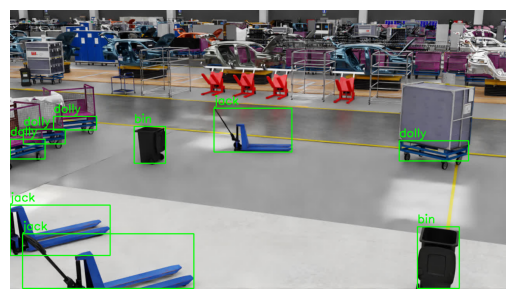

In [57]:
img_id=0
image = data_img[img_id]
bboxes = bboxes_list[img_id]
image_with_bboxes = visualize_bboxes(image, bboxes)
plt.imshow(cv2.cvtColor(image_with_bboxes, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.show()

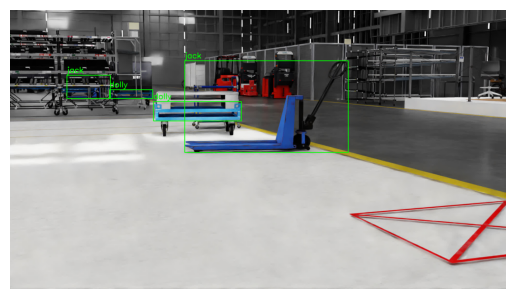

In [85]:
img_id=7
image = data_img[img_id]
bboxes = bboxes_list[img_id]
image_with_bboxes = visualize_bboxes(image, bboxes)
plt.imshow(cv2.cvtColor(image_with_bboxes, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.show()

# Data Augmentation using Albumentations

In [59]:
folder_path_labels = "../data/Training/labels/txt"

bboxes_list = []

for filename in os.listdir(folder_path_labels):
    if filename.endswith(".txt"):
        txt_path = os.path.join(folder_path_labels, filename)
        with open(txt_path, 'r') as file:
            lines = file.readlines()
            bboxes = []
            for line in lines:
                data = line.strip().split()
                bbox = [float(coord) for coord in data[1:]]  # Skipping the class ID in order to respect Albumentations YOLO format
                bbox.append(data[0])
                bboxes.append(bbox)
            bboxes_list.append(bboxes)


In [60]:
len(bboxes_list)

2494

In [61]:
len(data_img)

2494

In [62]:
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=130, p=0.5),  
    A.Blur(blur_limit=3, p=0.2),  
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.2),  
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=30, p=0.5), 
    A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=0.5),  
    A.CLAHE(clip_limit=4.0, p=0.5),  
], bbox_params=A.BboxParams(format='yolo'))


In [63]:
result_folder = "../data_augmented/Training"

In [64]:
for i in range(len(bboxes_list)):
    try:
        image = data_img[i]
        bboxes = bboxes_list[i]
        transformed = transform(image=image, bboxes=bboxes)
        transformed_image = transformed['image']
        transformed_bboxes = transformed['bboxes']
        cv2.imwrite(f"{result_folder}/images/t_{i}.jpg", transformed_image)
        with open(f"{result_folder}/labels/t_{i}.txt", 'w') as file:
            for bbox in transformed_bboxes:
                file.write(f"{bbox[4]} {bbox[0]} {bbox[1]} {bbox[2]} {bbox[3]}\n")
    except Exception as e:
        print(f"Error on iteration {i}: {e}")

Error on iteration 3: Expected x_min for bbox (-5.000000000000143e-05, 0.44865, 0.07264999999999999, 0.50835, '4') to be in the range [0.0, 1.0], got -5.000000000000143e-05.
Error on iteration 4: Expected x_min for bbox (-5.000000000000143e-05, 0.45415, 0.08825, 0.51525, '4') to be in the range [0.0, 1.0], got -5.000000000000143e-05.
Error on iteration 11: Expected x_min for bbox (-4.999999999999449e-05, 0.13749999999999996, 0.17265, 0.6431, '4') to be in the range [0.0, 1.0], got -4.999999999999449e-05.
Error on iteration 13: Expected x_min for bbox (-4.999999999999449e-05, 0.843, 0.35465, 0.9985999999999999, '4') to be in the range [0.0, 1.0], got -4.999999999999449e-05.
Error on iteration 19: Expected x_min for bbox (-5.000000000000143e-05, 0.5680499999999999, 0.08045, 0.71115, '4') to be in the range [0.0, 1.0], got -5.000000000000143e-05.
Error on iteration 26: Expected x_min for bbox (-4.999999999999449e-05, 0.25139999999999996, 0.17105, 0.45559999999999995, '4') to be in the ran

Clearly, some error was occuring with some of the files. This error is likely due to floating number arithmetics and overflowing in memory due to signed numbers since we can see some very small negative numbers that emerged. Regardless, we still obtained a good number of additional data input.
Let's try visualizing some of the transformed data:

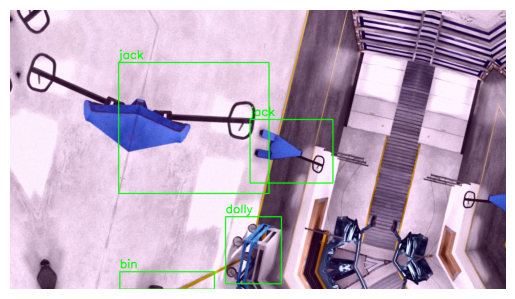

In [90]:
index = 247
img_path = f'../data_augmented/Training/images/t_{index}.jpg'
img = cv2.imread(img_path)

bboxes_list_temp = []
txt_path = f'../data_augmented/Training/labels/t_{index}.txt'

with open(txt_path, 'r') as file:
    lines = file.readlines()
    bboxes = []
    for line in lines:
        data = line.strip().split()
        bbox = [float(coord) for coord in data]
        bboxes.append(bbox)
    bboxes_list_temp.append(bboxes)

image = img
bboxes = bboxes_list_temp[0]
image_with_bboxes = visualize_bboxes(image, bboxes)
plt.imshow(cv2.cvtColor(image_with_bboxes, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.show()